In [17]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [5]:
df = yf.download('AAPL',start='2020-01-01',end='2024-04-01')
df.head(20)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960457,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251144,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826866,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650352,132079200
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.214745,170108400
2020-01-10,77.650002,78.167503,77.062500,77.582497,75.384773,140644800
2020-01-13,77.910004,79.267502,77.787498,79.239998,76.995323,121532000
2020-01-14,79.175003,79.392502,78.042503,78.169998,75.955635,161954400


In [6]:
df.shape

(1067, 6)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1.067000e+03
mean,143.025530,144.659370,141.492369,143.153355,141.452000,9.683922e+07
std,33.768796,33.865376,33.644654,33.766705,34.141017,5.370459e+07
min,57.020000,57.125000,53.152500,56.092499,54.632889,2.404830e+07
25%,124.980000,126.381248,123.841248,125.039997,122.914215,6.185145e+07
50%,147.220001,149.050003,145.809998,147.410004,145.815475,8.222550e+07
75%,170.974998,172.629997,169.479996,171.135002,169.797577,1.138023e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,4.265100e+08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1067 entries, 2020-01-02 to 2024-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1067 non-null   float64
 1   High       1067 non-null   float64
 2   Low        1067 non-null   float64
 3   Close      1067 non-null   float64
 4   Adj Close  1067 non-null   float64
 5   Volume     1067 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 58.4 KB


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

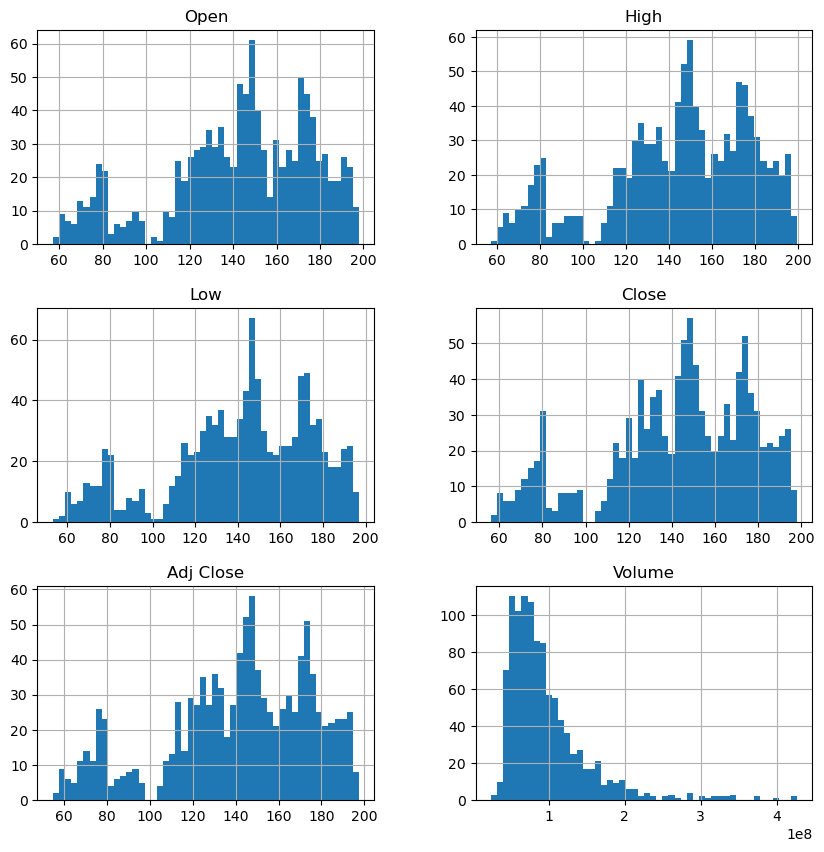

In [10]:
df.hist(bins=50,figsize=(10,10))

In [11]:
df["HL_Perc"] = (df["High"]-df["Low"]) / df["Low"] * 100
df["CO_Perc"] = (df["Close"] - df["Open"]) / df["Open"] * 100

In [14]:
df = df[["HL_Perc", "CO_Perc", "Adj Close", "Volume"]]

In [15]:
df["PriceNextMonth"] = df["Adj Close"].shift(-30)

/var/folders/qj/fxsf77sd1p38mdc08b1lfqrr0000gn/T/ipykernel_83980/2029729962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PriceNextMonth"] = df["Adj Close"].shift(-30)


In [16]:
df.tail()

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
Date,,,,,
2024-03-22,1.758206,0.302751,172.046646,71106600,NaN
2024-03-25,1.469463,0.164155,170.618591,54288300,NaN
2024-03-26,1.085031,-0.170584,169.480133,57388400,NaN
2024-03-27,2.051617,1.701774,173.075241,60273300,NaN
2024-03-28,1.008739,-0.157208,171.247726,65672700,NaN


In [19]:
X = np.array(df.drop(columns="PriceNextMonth",axis= 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
df.dropna(inplace = True)
y = np.array(df["PriceNextMonth"])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/var/folders/qj/fxsf77sd1p38mdc08b1lfqrr0000gn/T/ipykernel_83980/2492121259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [21]:
model = RandomForestRegressor()

In [22]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
accuracy = model.score(X_train, y_train)
accuracy

0.9818528094185045

In [24]:
model.fit(X,y)

RandomForestRegressor()

In [25]:
predictions = model.predict(X_test)
predictions

array([141.25135056, 137.91645782, 151.03720993, 185.58601303,
       128.62171165, 135.92216331,  82.81388214, 153.57723465,
       161.92323212, 118.35669418, 193.26386368, 129.83647873,
       178.60191055, 141.53662971, 145.07260223, 152.07239258,
        66.55544331, 126.14140198, 139.37582169, 159.74554214,
       154.71967712,  68.03081188, 129.26442886,  64.00626675,
       156.91029037, 168.45932205, 146.38131531, 167.42584747,
       144.45776123, 149.90890106, 128.55025841, 126.22817596,
       149.00110298,  72.53663486, 157.28748901, 126.14912025,
       138.17737579, 159.70129807, 112.55120888, 145.8390126 ,
       138.08498894, 143.64465927, 122.47681236, 183.76522141,
        68.47279434, 109.52560783, 156.4538797 , 145.62538132,
       139.05712761, 157.49417221, 137.81461441, 138.80989235,
        93.85586746, 145.31939224, 129.67366112, 145.99314743,
       143.32982399, 165.30485489, 176.55340958, 173.01654037,
       132.89986565, 155.66546776, 144.43630081,  85.52

In [27]:
df

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
Date,,,,,
2020-01-02,1.832719,1.387394,72.960457,135480400,79.123589
2020-01-03,1.376049,0.094228,72.251144,146322800,77.674789
2020-01-06,2.462849,2.045672,72.826866,118387200,78.799744
2020-01-07,1.149651,-0.483585,72.484344,108872000,77.991333
2020-01-08,2.449858,2.029209,73.650352,132079200,76.225998
...,...,...,...,...,...
2024-02-08,1.168928,-0.564968,187.825256,40962000,172.046646
2024-02-09,1.058514,0.106023,188.594208,45155200,170.618591
2024-02-12,1.006481,-0.674028,186.896500,41781900,169.480133


Text(0, 0.5, 'Price')

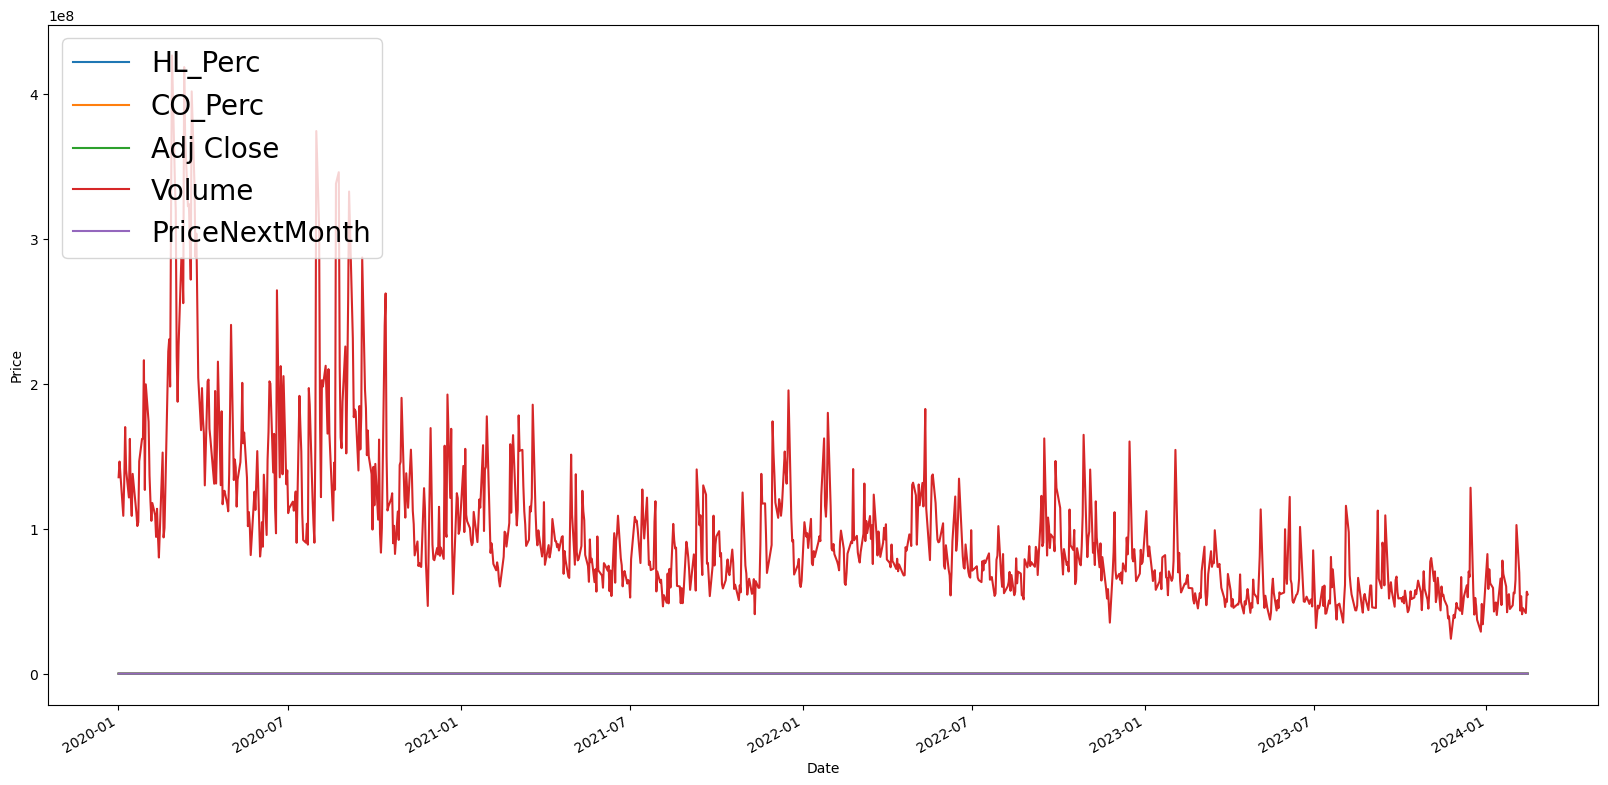

In [26]:
df.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')

<Axes: xlabel='Date'>

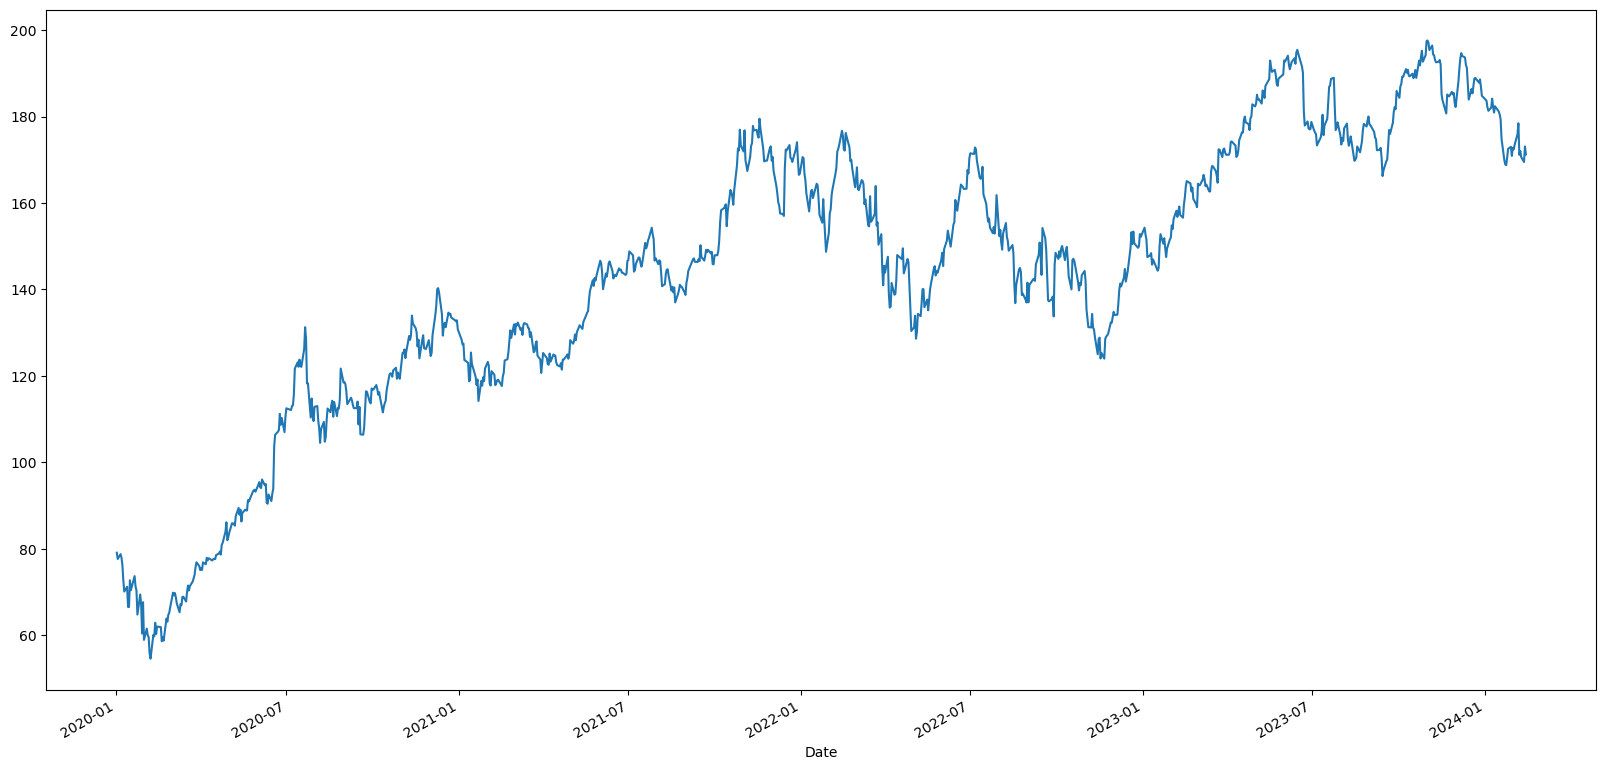

In [28]:
df.PriceNextMonth.plot(figsize=(20,10), linewidth=1.5)